In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('pizza_data.csv', index_col=0, low_memory=False)
df.reset_index(drop=False, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   address1                            463 non-null    object 
 1   address2                            13 non-null     object 
 2   city                                463 non-null    object 
 3   country                             463 non-null    object 
 4   createdAt                           463 non-null    object 
 5   loc.coordinates                     463 non-null    object 
 6   name                                463 non-null    object 
 7   priceLevel                          463 non-null    int64  
 8   reviewStats.community.averageScore  463 non-null    float64
 9   reviewStats.community.count         463 non-null    int64  
 10  reviewStats.dave.averageScore       463 non-null    float64
 11  reviewStats.dave.count              463 non-n

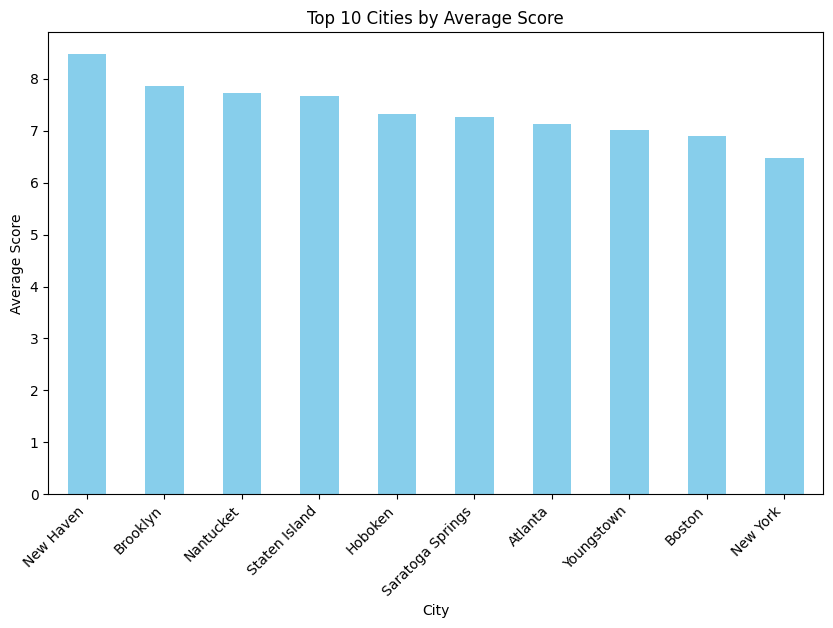

In [ ]:
filtered_df = df.groupby('city').filter(lambda x: len(x) >= 4)

average_scores = filtered_df.groupby('city')['reviewStats.dave.totalScore'].mean()

top_city = average_scores.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_city.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Average Score')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression_df = df[df['reviewStats.community.averageScore'] > 0]

predictors = ['priceLevel', 'reviewStats.community.averageScore', 'latitude', 'longitude']

regression_df = regression_df.dropna(subset=predictors + ['reviewStats.dave.totalScore'])

X = regression_df[predictors]
y = regression_df['reviewStats.dave.totalScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

coefficients_labeled = dict(zip(predictors, model.coef_))

mse, coefficients_labeled


(2.0668661301932976,
 {'priceLevel': 0.12739480213000984,
  'reviewStats.community.averageScore': 0.926658473850145,
  'latitude': 0.02539464653703208,
  'longitude': 0.0032956097339749135})

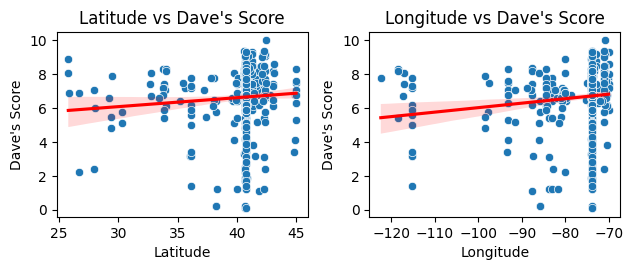

In [ ]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='latitude', y='reviewStats.dave.totalScore', data=regression_df)
sns.regplot(x='latitude', y='reviewStats.dave.totalScore', data=regression_df, scatter=False, color='red')
plt.title("Latitude vs Dave's Score")
plt.xlabel('Latitude')
plt.ylabel("Dave's Score")

plt.subplot(2, 2, 4)
sns.scatterplot(x='longitude', y='reviewStats.dave.totalScore', data=regression_df)
sns.regplot(x='longitude', y='reviewStats.dave.totalScore', data=regression_df, scatter=False, color='red')
plt.title("Longitude vs Dave's Score")
plt.xlabel('Longitude')
plt.ylabel("Dave's Score")

plt.tight_layout()
plt.show()

In [ ]:
city_mean_score = df.groupby('city')['reviewStats.dave.totalScore'].mean()

def calculate_new_score(row):
    if row['reviewStats.community.averageScore'] == 0:
        city_score = city_mean_score[row['city']]
        return (row['reviewStats.dave.totalScore'] + city_score) / 2
    else:
        return row['reviewStats.community.averageScore']

df['reviewStats.community.averageScore'] = df.apply(calculate_new_score, axis=1)

In [ ]:
correlationPrice = df['priceLevel'].corr(df['reviewStats.dave.totalScore'])
correlationCommunity = df['reviewStats.dave.totalScore'].corr(df['reviewStats.community.averageScore'])

print(f"Correlation between Price and Score: {correlationPrice}")
print(f"Correlation between Price and Score: {correlationCommunity}")

Correlation between Price and Score: 0.20744656552933236
Correlation between Price and Score: 0.6765868538140483


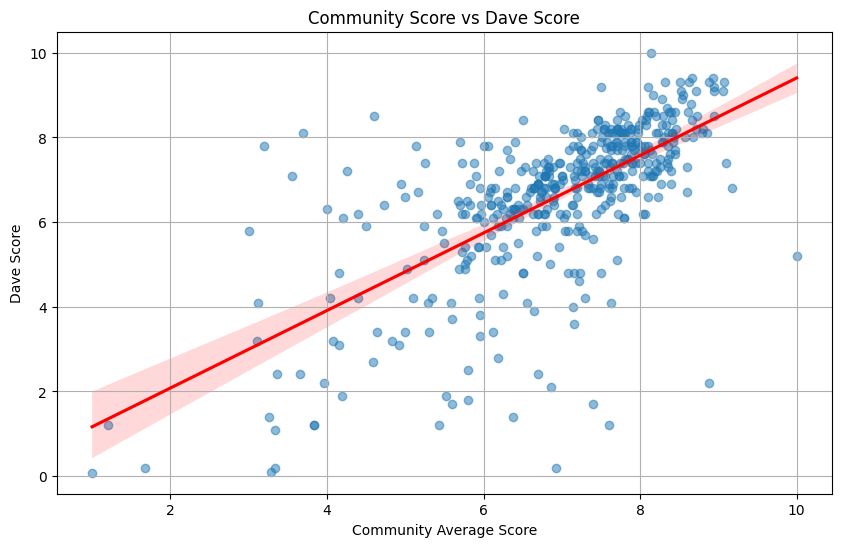

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(regression_df['reviewStats.community.averageScore'], regression_df['reviewStats.dave.totalScore'], alpha=0.5)
sns.regplot(x='reviewStats.community.averageScore', y='reviewStats.dave.totalScore', data=regression_df, scatter=False, color='red')
plt.title('Community Score vs Dave Score')
plt.xlabel('Community Average Score')
plt.ylabel('Dave Score')
plt.grid(True)
plt.show()

In [ ]:
#Feature Engineering to determine if Dave is in new york or not
df['Is_New_York'] = df['city'].apply(lambda x: x.lower() == 'new york')

In [ ]:
df.head(10)

,address1,address2,city,country,createdAt,loc.coordinates,name,priceLevel,reviewStats.community.averageScore,reviewStats.community.count,...,reviewStats.dave.totalScore,state,zip,formatted_address,latitude,longitude,string_concat,dave_score_int,review_number,Is_New_York
0,590 E 191st St,NaN,Bronx,US,2018-03-23T17:38:23.940Z,"[-73.88475, 40.85881]",Pugsley's Pizza,1,7.992000,25,...,7.7,NY,10458,"590 E 191st St, The Bronx, NY 10458, USA",40.858769,-73.884837,Pugsley's Pizza | Dave - 7.7 | Community - 7.99,77,0,False
1,265 Union Ave,NaN,Brooklyn,US,2018-03-23T17:38:25.932Z,"[-73.9507711, 40.7078768]",Williamsburg Pizza,1,7.742308,26,...,8.6,NY,11211,"265 Union Ave, Brooklyn, NY 11211, USA",40.708082,-73.950903,Williamsburg Pizza | Dave - 8.6 | Community - ...,86,1,False
2,473 Lexington Ave,NaN,New York,US,2018-03-23T17:38:28.758Z,"[-73.9741563, 40.7537359]",99 Cent Fresh Pizza,1,5.762500,8,...,4.9,NY,10017,"473 Lexington Ave, New York, NY 10017, USA",40.753700,-73.974113,99 Cent Fresh Pizza | Dave - 4.9 | Community -...,49,2,True
3,39 W 46th St,NaN,New York,US,2018-03-23T17:38:31.004Z,"[-73.980516, 40.7569159]",Nino's 46,2,6.690199,0,...,6.9,NY,10036,"39 W 46th St, New York, NY 10036, USA",40.756901,-73.980518,Nino's 46 | Dave - 6.9 | Community - 0.0,69,3,True
4,31 E 20th St,NaN,New York,US,2018-03-23T17:38:35.470Z,"[-73.9888916015625, 40.7390403747559]",La Pizza Fresca Ristorante,2,6.790199,0,...,7.1,NY,10003,"31 E 20th St, New York, NY 10003, USA",40.739047,-73.988895,La Pizza Fresca Ristorante | Dave - 7.1 | Comm...,71,4,True
5,382 8th Ave,NaN,New York,US,2018-03-23T17:38:37.943Z,"[-73.995422, 40.7490441]",La Gusto Pizza,1,4.366667,3,...,3.2,NY,10001,NaN,NaN,NaN,La Gusto Pizza | Dave - 3.2 | Community - 4.37,32,5,True
6,2640 Broadway,NaN,New York,US,2018-03-23T17:38:40.081Z,"[-73.96948, 40.79716]",Cheesy Pizza,1,6.125000,4,...,6.1,NY,10025,"2640 Broadway, New York, NY 10025, USA",40.797189,-73.969573,Cheesy Pizza | Dave - 6.1 | Community - 6.12,61,6,True
7,2671 Broadway,NaN,New York,US,2018-03-23T17:38:42.107Z,"[-73.9694405, 40.7983115]",Sal & Carmine's Pizza,1,7.450000,16,...,7.2,NY,10025,"2671 Broadway, New York, NY 10025, USA",40.798383,-73.969439,Sal & Carmine's Pizza | Dave - 7.2 | Community...,72,7,True
8,2750 Broadway,NaN,New York,US,2018-03-23T17:38:44.491Z,"[-73.96766, 40.80084]",MAMA'S TOO!,2,7.353846,13,...,6.8,NY,10025,"2750 Broadway, New York, NY 10025, USA",40.800832,-73.967590,MAMA'S TOO! | Dave - 6.8 | Community - 7.35,68,8,True
9,221 W 46th St,NaN,New York,US,2018-03-23T17:38:46.897Z,"[-73.9859788257256, 40.7591637016814]",Bond 45,2,6.725000,4,...,6.5,NY,10036,"221 W 46th St, New York, NY 10036, USA",40.759374,-73.986175,Bond 45 | Dave - 6.5 | Community - 6.72,65,9,True


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df[['priceLevel', 'reviewStats.community.averageScore', 'Is_New_York']]
y = df['reviewStats.dave.totalScore']

rf_model = RandomForestRegressor(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#Find the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Figure out which features were most important
feature_importances = rf_model.feature_importances_
print(f"Feature Importances: {feature_importances}")

Mean Squared Error: 3.356944240355494
Feature Importances: [0.04444262 0.92565676 0.02990063]


In [ ]:
import plotly.express as px
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='reviewStats.dave.totalScore',
                     hover_name='name',
                     hover_data={'reviewStats.dave.totalScore': True,
                                 'latitude': False,
                                 'longitude': False},
                     scope='usa',
                     projection="albers usa")
fig.update_layout(title='Pizza Restaurant Reviews',
                  coloraxis_colorbar=dict(title="Score"))
fig.show()

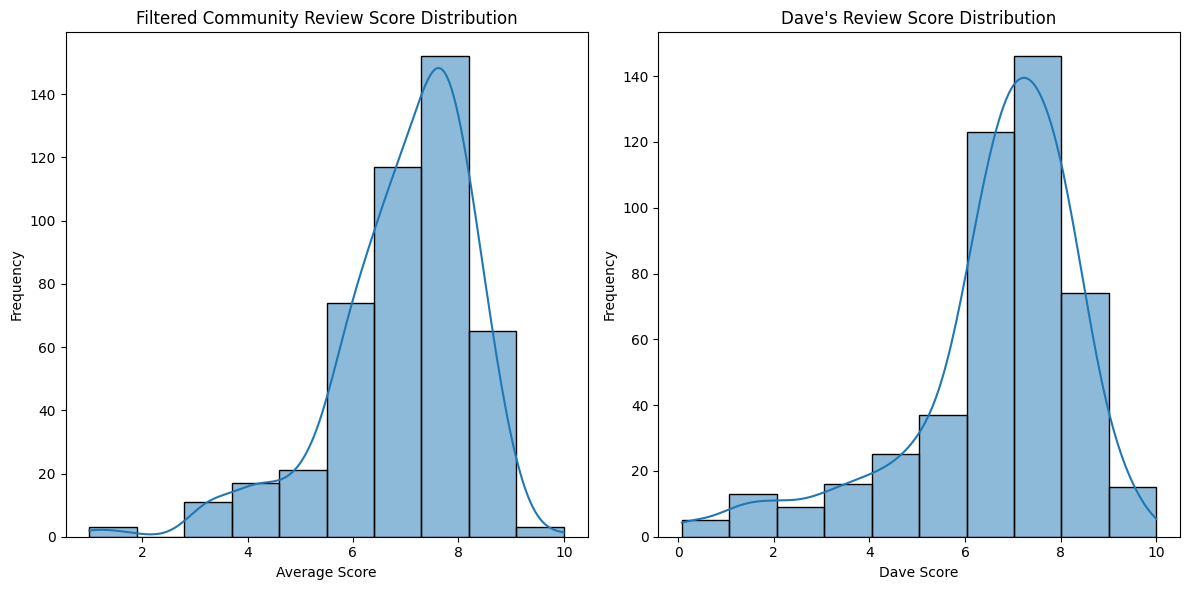

In [ ]:
# Filtering out entries where the community score is 0 (meaning no reviews)
filtered_pizza_data = df[df['reviewStats.community.averageScore'] > 0]

# New Distribution of Community Review Scores
filtered_community_score_distribution = filtered_pizza_data['reviewStats.community.averageScore']

# Dave's Review Score Distribution (no change needed, as all entries have Dave's score)
filtered_dave_score_distribution = filtered_pizza_data['reviewStats.dave.totalScore']

# Preparing plots for the revised distributions
plt.figure(figsize=(12, 6))

# Filtered Community Score Distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_community_score_distribution, bins=10, kde=True)
plt.title('Filtered Community Review Score Distribution')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Dave's Score Distribution
plt.subplot(1, 2, 2)
sns.histplot(filtered_dave_score_distribution, bins=10, kde=True)
plt.title("Dave's Review Score Distribution")
plt.xlabel('Dave Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()